<a href="https://colab.research.google.com/github/flaakira/Kaggle/blob/master/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('train.csv')

In [0]:
test = pd.read_csv('test.csv')

In [0]:
sample_sub = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Correlation between all Variables.

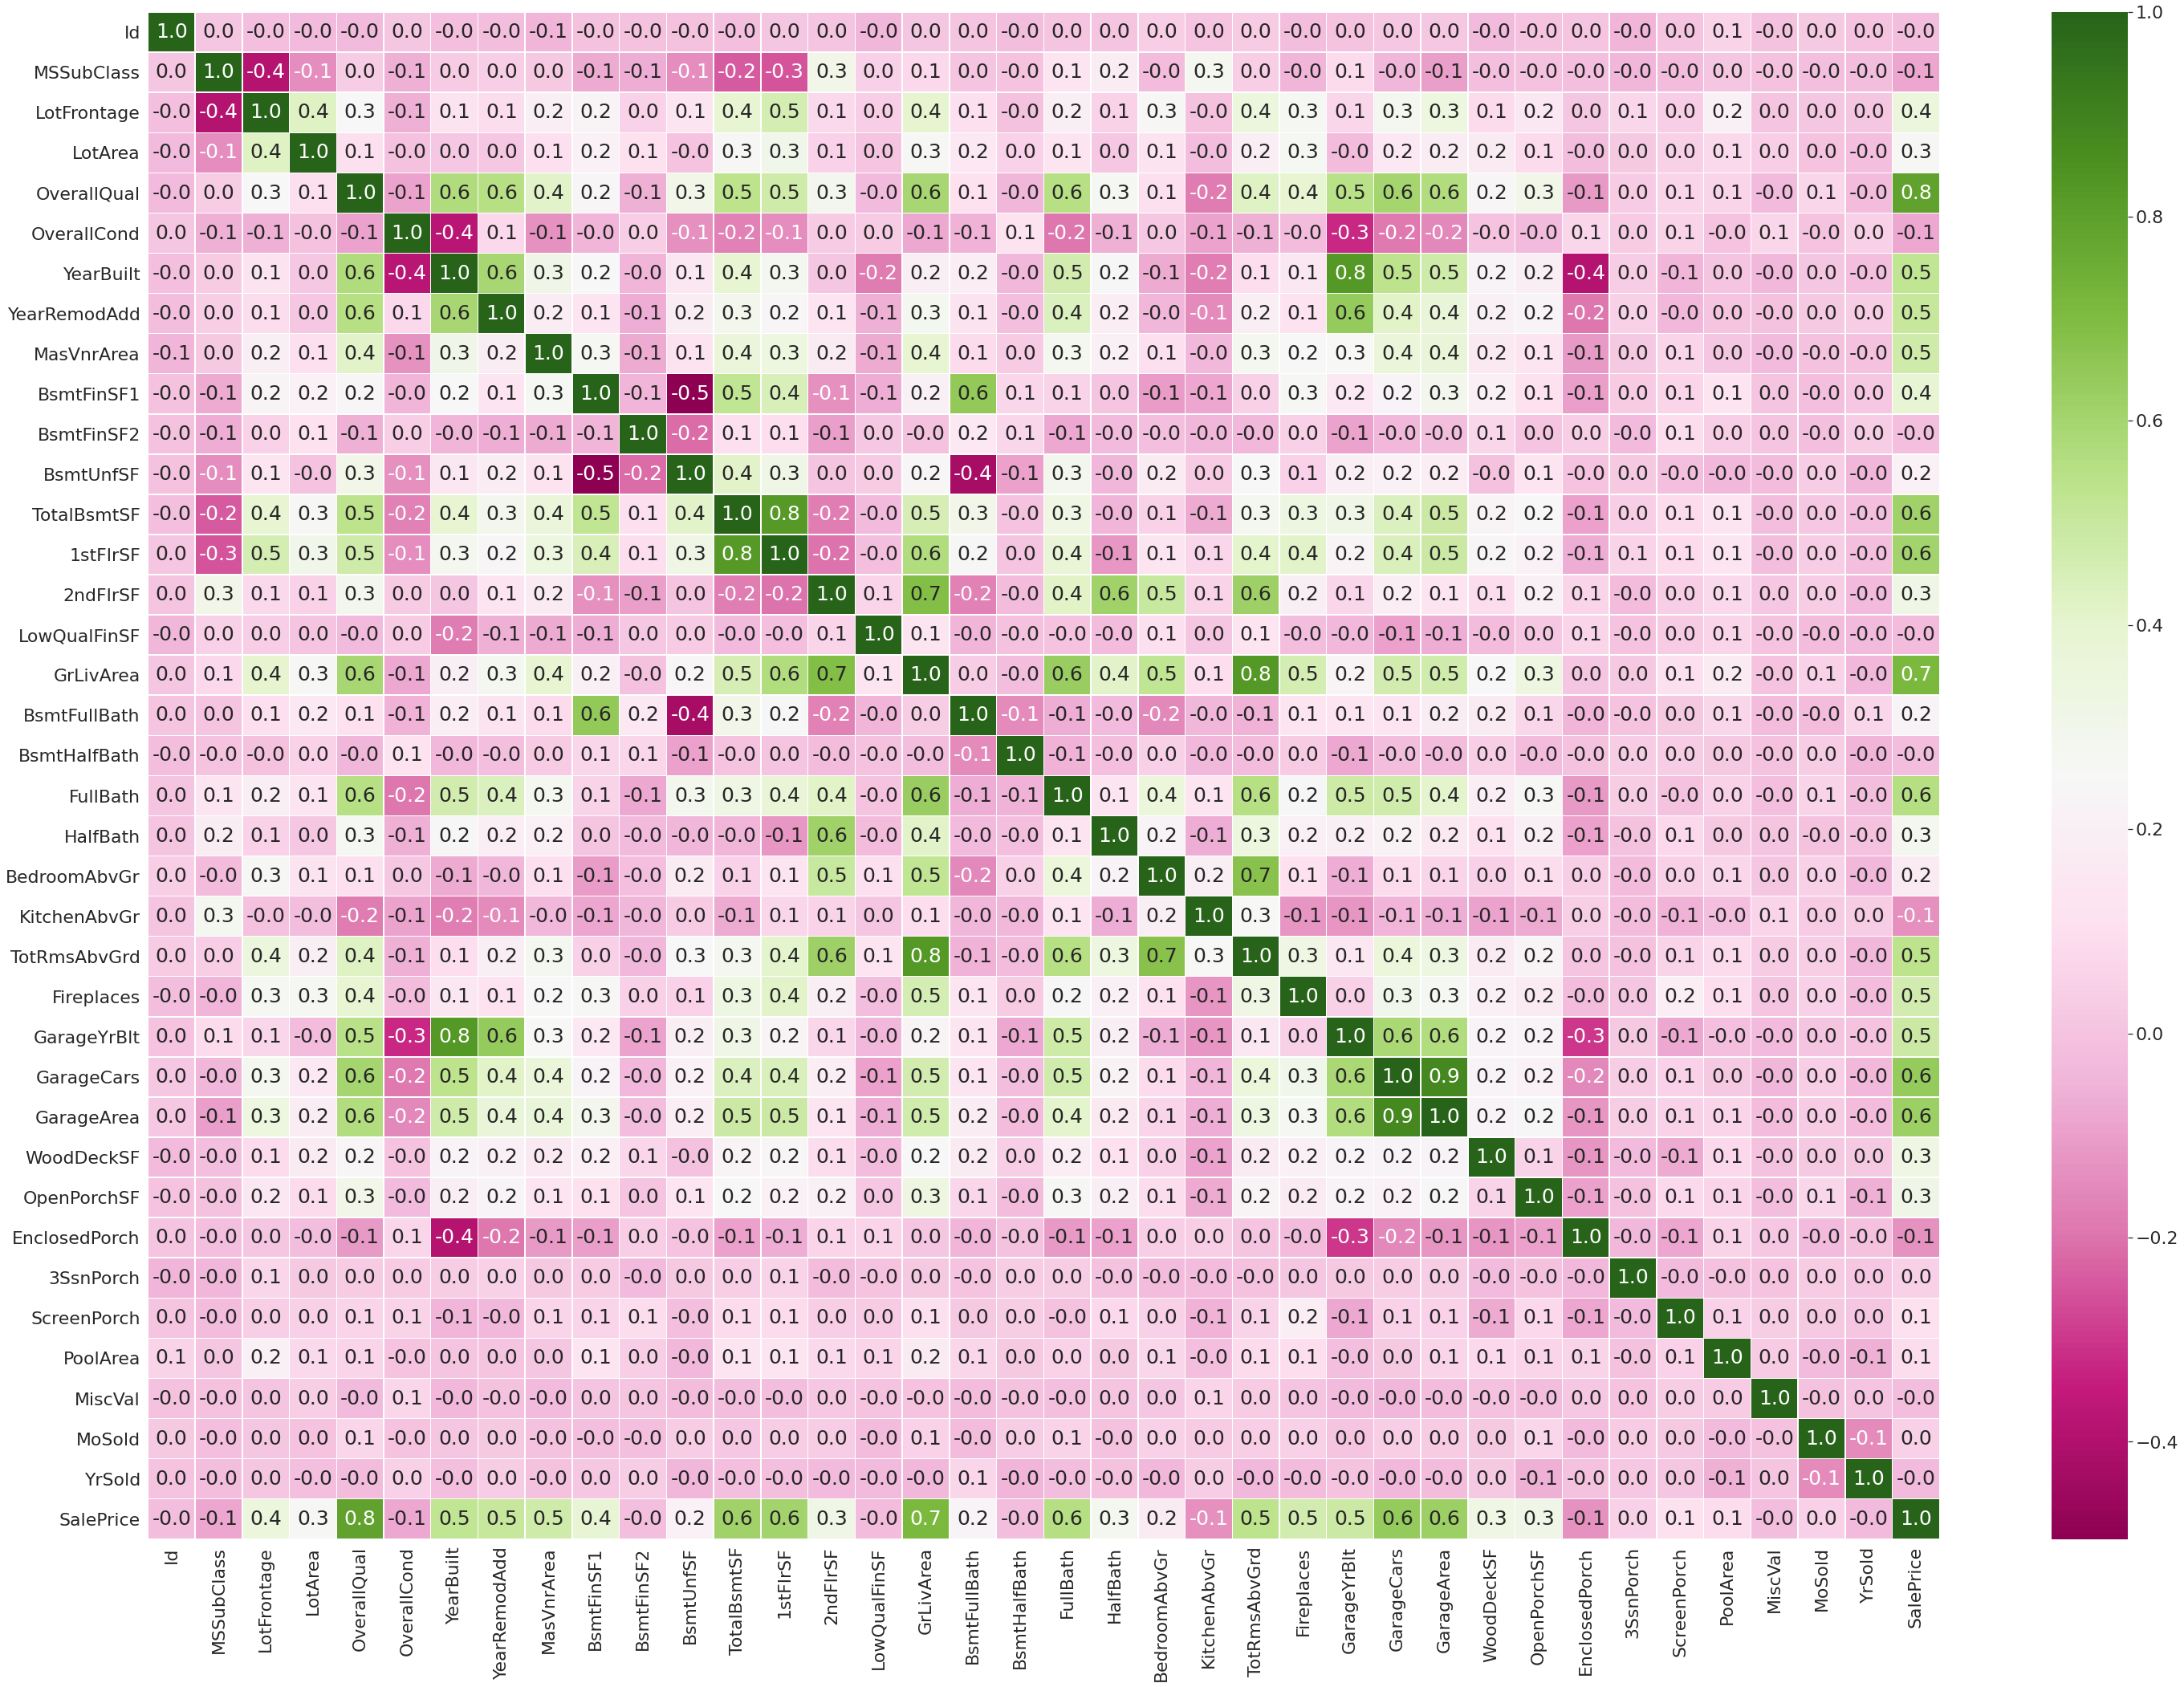

In [6]:
correlation_train=train.corr()
sb.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sb.heatmap(correlation_train, annot=True,annot_kws={"size": 25},
                fmt='.1f',cmap='PiYG', linewidths=.5)

In [7]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.8)) | (value<=-0.1):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

# Correlation between Year Built X Sales Price

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

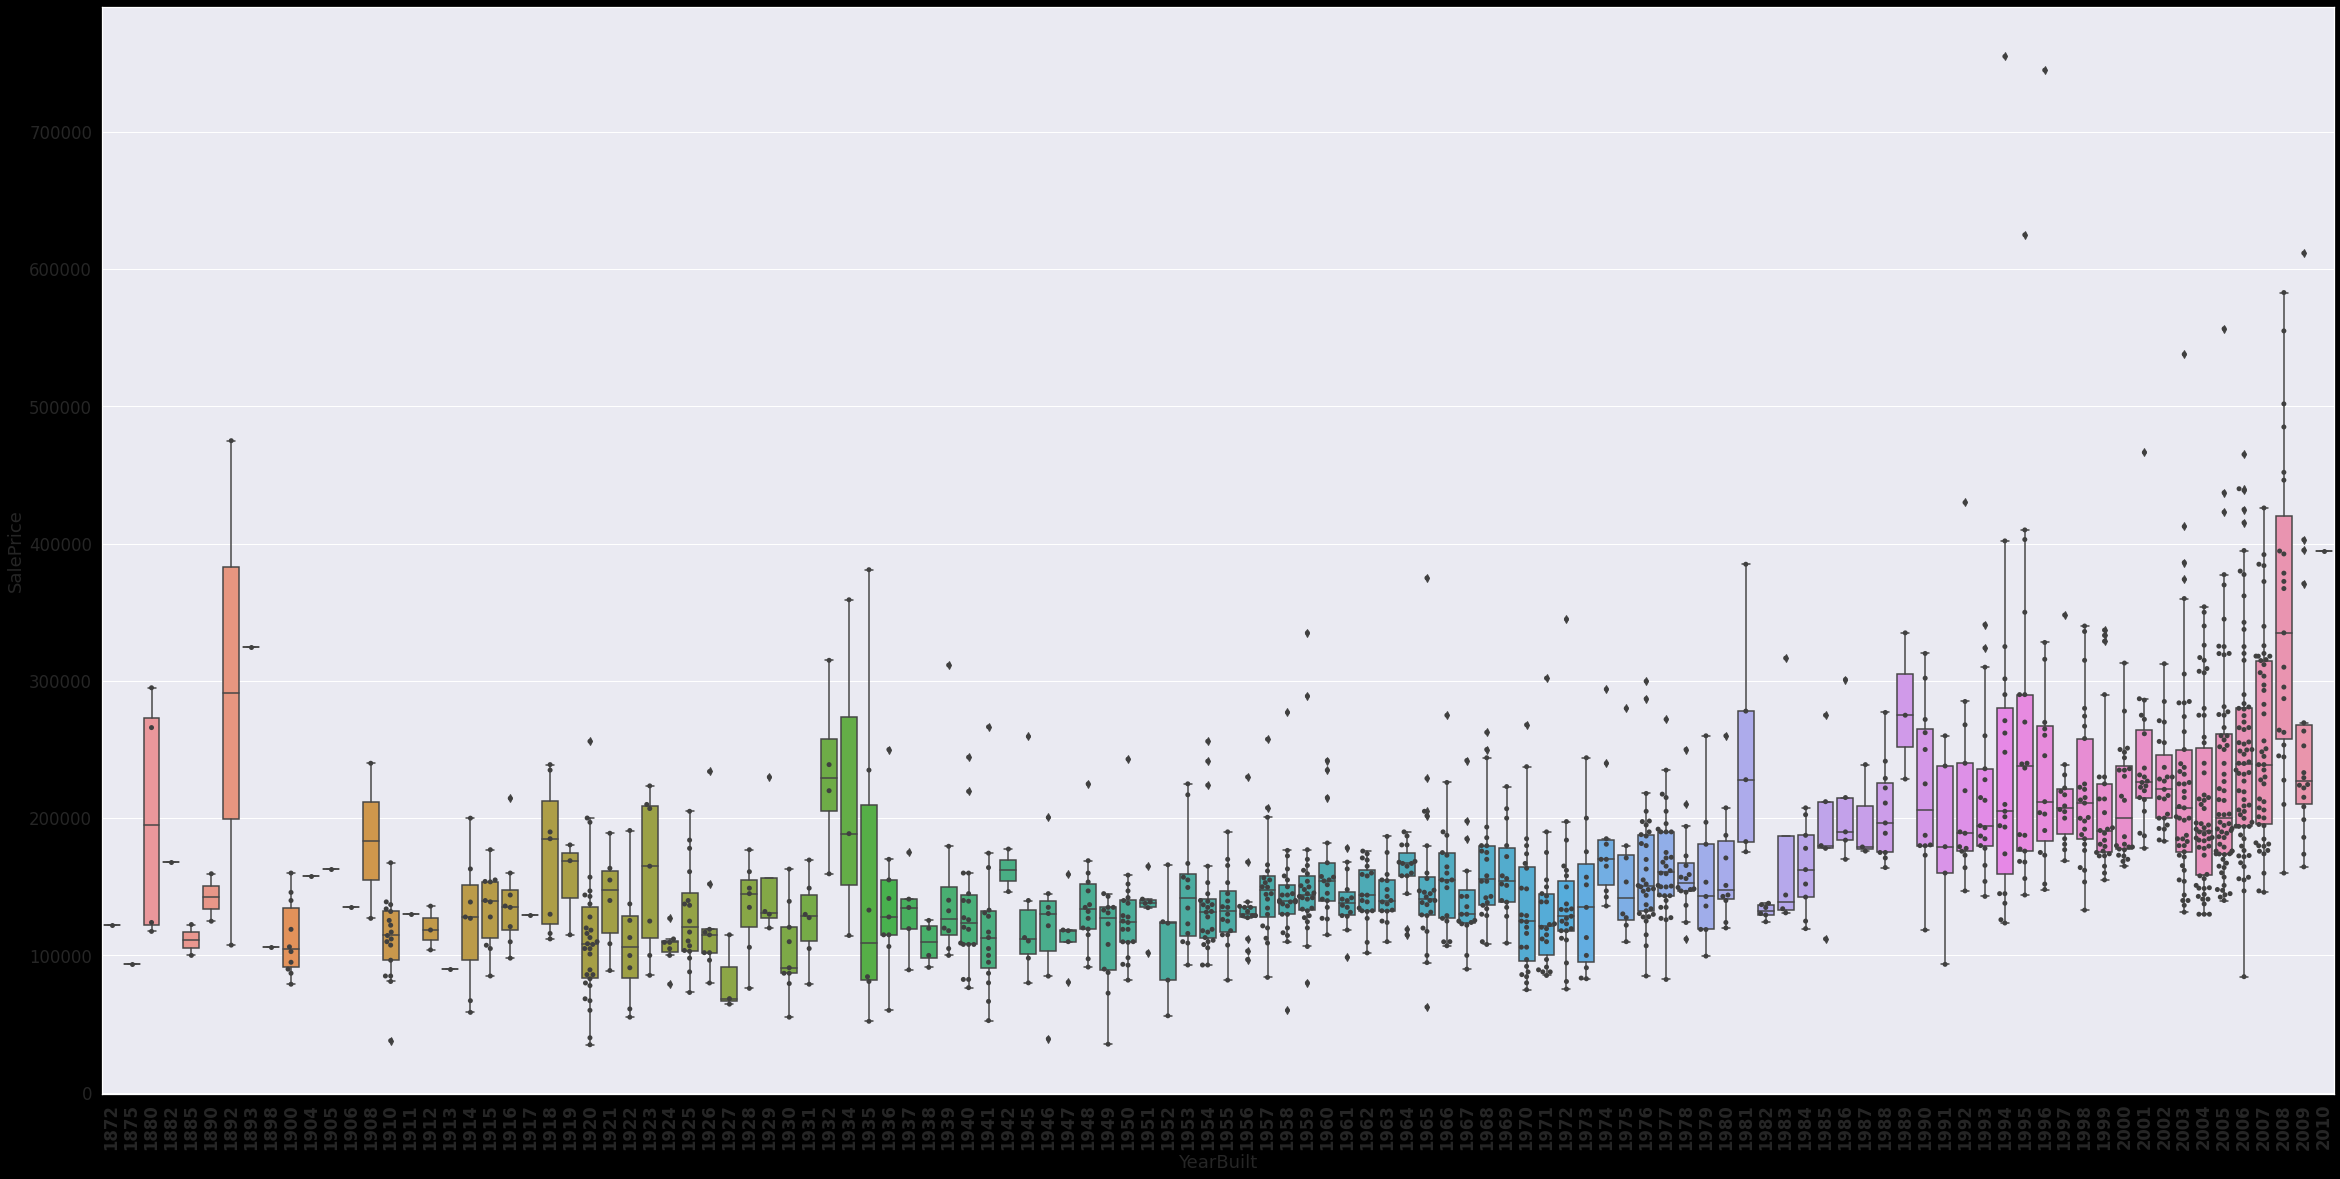

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(40,20))
sb.set(font_scale=1.5)
sb.boxplot(x='YearBuilt', y="SalePrice", data=train)
sb.swarmplot(x='YearBuilt', y="SalePrice", data=train, color=".25")
plt.xticks(weight='bold',rotation=90)

# Clean and Edit DataFrame

In [9]:
train_test=pd.concat([train,test],axis=0,sort=False)
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
pd.set_option('display.max_rows', 10000)
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

,Count of NaN,DataTypes
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,486,float64
LotArea,0,int64
Street,0,object
Alley,2721,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
train_test.loc[train_test['Fireplaces']==0,'FireplaceQu']='Nothing'
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean'))
train_test['LotFrontage'].interpolate(method='linear',inplace=True)
train_test['LotFrontage']=train_test['LotFrontage'].astype(int)
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)
train_test["Fence"] = train_test["Fence"].fillna("None")
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("None")
train_test.loc[train_test['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
train_test.loc[train_test['BsmtFinSF2']==0,'BsmtQual']='TA'
train_test['YrBltRmd']=train_test['YearBuilt']+train_test['YearRemodAdd']
train_test['Total_Square_Feet'] = (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + train_test['1stFlrSF'] + train_test['2ndFlrSF'] + train_test['TotalBsmtSF'])
train_test['Total_Bath'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))
train_test['Total_Porch_Area'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])
train_test['exists_pool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_garage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_fireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_bsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['old_house'] = train_test['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

for i in train_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(train_test[str(i)].dtype):
            train_test[str(i)]=train_test[str(i)].fillna(method='ffill')

In [0]:
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'YrSold', 'MoSold', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')

for col in columns:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [0]:
from scipy.stats import skew

In [15]:
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

MiscVal              21.947195
PoolArea             16.898328
exists_pool          14.884318
LotArea              12.822431
LowQualFinSF         12.088761
3SsnPorch            11.376065
LandSlope             4.975157
KitchenAbvGr          4.302254
EnclosedPorch         4.003891
ScreenPorch           3.946694
MasVnrArea            2.600375
OpenPorchSF           2.535114
WoodDeckSF            1.842433
LotFrontage           1.483631
1stFlrSF              1.469604
Total_Porch_Area      1.376649
GrLivArea             1.269358
2ndFlrSF              0.861675
TotRmsAbvGrd          0.758367
MSSubClass            0.738722
Fireplaces            0.733495
HalfBath              0.694566
OverallCond           0.570312
HeatingQC             0.486656
FireplaceQu           0.333787
BedroomAbvGr          0.326324
OverallQual           0.197110
MoSold                0.195884
FullBath              0.167606
YrSold                0.132399
Id                    0.000000
exists_fireplace     -0.054148
BsmtFinT

In [0]:
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index

In [17]:
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

MiscVal             21.947195
PoolArea            16.898328
exists_pool         14.884318
LotArea             12.822431
LowQualFinSF        12.088761
3SsnPorch           11.376065
LandSlope            4.975157
KitchenAbvGr         4.302254
EnclosedPorch        4.003891
ScreenPorch          3.946694
MasVnrArea           2.600375
OpenPorchSF          2.535114
WoodDeckSF           1.842433
LotFrontage          1.483631
1stFlrSF             1.469604
Total_Porch_Area     1.376649
GrLivArea            1.269358
BsmtExposure        -1.176341
KitchenQual         -1.448023
ExterQual           -1.801409
Fence               -1.993777
ExterCond           -2.497719
PavedDrive          -2.979084
BsmtCond            -3.301446
BsmtFinType2        -3.412861
CentralAir          -3.459022
GarageQual          -3.919880
exists_garage       -3.941054
Functional          -4.055757
GarageCond          -5.147262
exists_bsmt         -5.828995
BsmtQual            -6.303596
Street             -15.500133
PoolQC    

In [0]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [19]:
for feature in skewed_features:
    train_test[feature] = boxcox1p(train_test[feature], boxcox_normmax(train_test[feature] + 1))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [20]:
train_test[['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street','PoolQC']].head()

,MiscVal,PoolArea,exists_pool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,LotFrontage,1stFlrSF,Total_Porch_Area,GrLivArea,BsmtExposure,KitchenQual,ExterQual,Fence,ExterCond,PavedDrive,BsmtCond,BsmtFinType2,CentralAir,GarageQual,exists_garage,Functional,GarageCond,exists_bsmt,BsmtQual,Street,PoolQC
0,0.0,0.0,0.0,13.424520,0.0,0.0,0.0,0.75096,0.000000,0.0,19.509966,12.009558,0.000000,13.668864,5.318379,18.721470,7.234115,6.112249,5.077704,5.498765,6.897404,5.100237,10.465804,5.218987,1444.255548,72.932968,23.440981,1.096819,30.831053,2952.40927,41.797413,54.556642,1.965139,3975.432981
1,0.0,0.0,0.0,13.694527,0.0,0.0,0.0,0.75096,0.000000,0.0,0.000000,0.000000,56.339208,15.311587,5.550627,51.575372,6.947212,1.372290,10.302990,11.456357,6.897404,5.100237,10.465804,5.218987,1444.255548,72.932968,23.440981,1.096819,30.831053,2952.40927,41.797413,54.556642,1.965139,3975.432981
2,0.0,0.0,0.0,14.034133,0.0,0.0,0.0,0.75096,0.000000,0.0,17.835996,9.849185,0.000000,14.011693,5.362015,14.644414,7.275132,3.429155,5.077704,5.498765,6.897404,5.100237,10.465804,5.218987,1444.255548,72.932968,23.440981,1.096819,30.831053,2952.40927,41.797413,54.556642,1.965139,3975.432981
3,0.0,0.0,0.0,13.683421,0.0,0.0,0.0,0.75096,16.012025,0.0,0.000000,8.921746,0.000000,13.079140,5.388291,52.547851,7.237969,6.112249,5.077704,11.456357,6.897404,5.100237,10.465804,1.280547,1444.255548,72.932968,23.440981,1.096819,30.831053,2952.40927,41.797413,54.556642,1.965139,3975.432981
4,0.0,0.0,0.0,14.550142,0.0,0.0,0.0,0.75096,0.000000,0.0,25.518156,14.180238,42.351292,15.722537,5.493032,49.148918,7.470741,0.000000,5.077704,5.498765,6.897404,5.100237,10.465804,5.218987,1444.255548,72.932968,23.440981,1.096819,30.831053,2952.40927,41.797413,54.556642,1.965139,3975.432981


In [0]:
train_test=pd.get_dummies(train_test,dtype='int8')

In [22]:
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_test_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_test_info

,Count of NaN,DataTypes
Id,0,int64
MSSubClass,0,int64
LotFrontage,0,float64
LotArea,0,float64
Street,0,float64
Alley,0,int64
LotShape,0,int64
LandSlope,0,float64
OverallQual,0,int64
OverallCond,0,int64


In [0]:
train=train_test[0:1460]
test=train_test[1460:2919]

In [24]:
len(train)

1460

In [25]:
train.interpolate(method='linear',inplace=True)
test.interpolate(method='linear',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


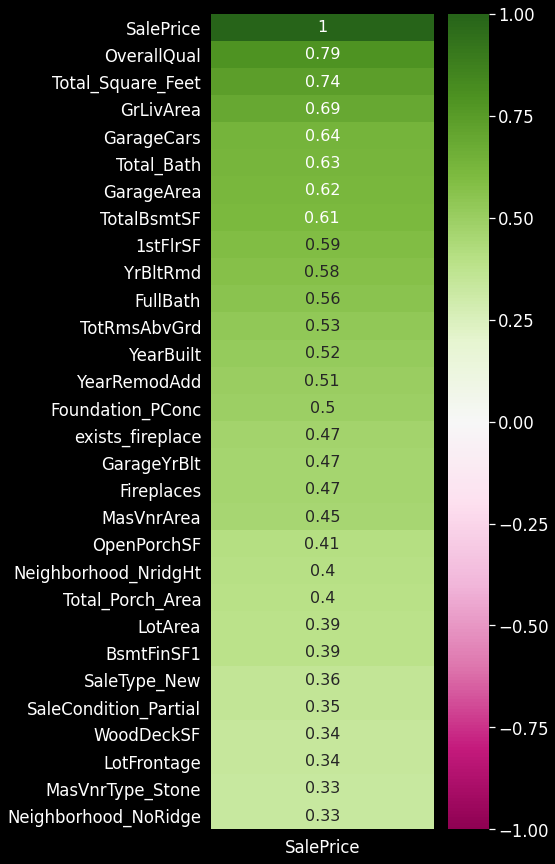

In [26]:
plt.style.use('dark_background')
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

# Best 40% columns + or - correlative with SalePrice

In [27]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
corr_dict2

{'1stFlrSF': 0.5885261489325692,
 '2ndFlrSF': 0.31933380283206614,
 '3SsnPorch': 0.04743159697053285,
 'Alley': 0.08312112052038152,
 'BedroomAbvGr': 0.1682131543007415,
 'BldgType_1Fam': 0.13748324869515327,
 'BldgType_2fmCon': -0.09734830194128331,
 'BldgType_Duplex': -0.114654830022284,
 'BldgType_Twnhs': -0.09873019861048951,
 'BldgType_TwnhsE': 0.0038043834533088893,
 'BsmtCond': 0.05759519409934413,
 'BsmtExposure': -0.2972373702234061,
 'BsmtFinSF1': 0.38641980624215627,
 'BsmtFinSF2': -0.011378121450215216,
 'BsmtFinType1': -0.09210633107556564,
 'BsmtFinType2': 0.05726980388386905,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtHalfBath': -0.016844154297359294,
 'BsmtQual': -0.053497028203389654,
 'BsmtUnfSF': 0.214479105546969,
 'CentralAir': 0.251328163840157,
 'Condition1_Artery': -0.10640071096805158,
 'Condition1_Feedr': -0.11732867748568224,
 'Condition1_Norm': 0.11296832108736438,
 'Condition1_PosA': 0.0420168990854169,
 'Condition1_PosN': 0.04954116844794432,
 'Condition1

In [28]:
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.3175) & (value<0.9)) | (value<=-0.315):
        best_columns.append(key)
best_columns

['OverallQual',
 'Total_Square_Feet',
 'GrLivArea',
 'GarageCars',
 'Total_Bath',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YrBltRmd',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation_PConc',
 'exists_fireplace',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'OpenPorchSF',
 'Neighborhood_NridgHt',
 'Total_Porch_Area',
 'LotArea',
 'BsmtFinSF1',
 'SaleType_New',
 'SaleCondition_Partial',
 'WoodDeckSF',
 'LotFrontage',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 '2ndFlrSF',
 'Foundation_CBlock',
 'MasVnrType_None',
 'GarageType_Detchd',
 'HeatingQC',
 'GarageFinish',
 'old_house',
 'KitchenQual',
 'ExterQual']

In [29]:
print(len(best_columns))

38


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]), <a list of 38 Text major ticklabel objects>)

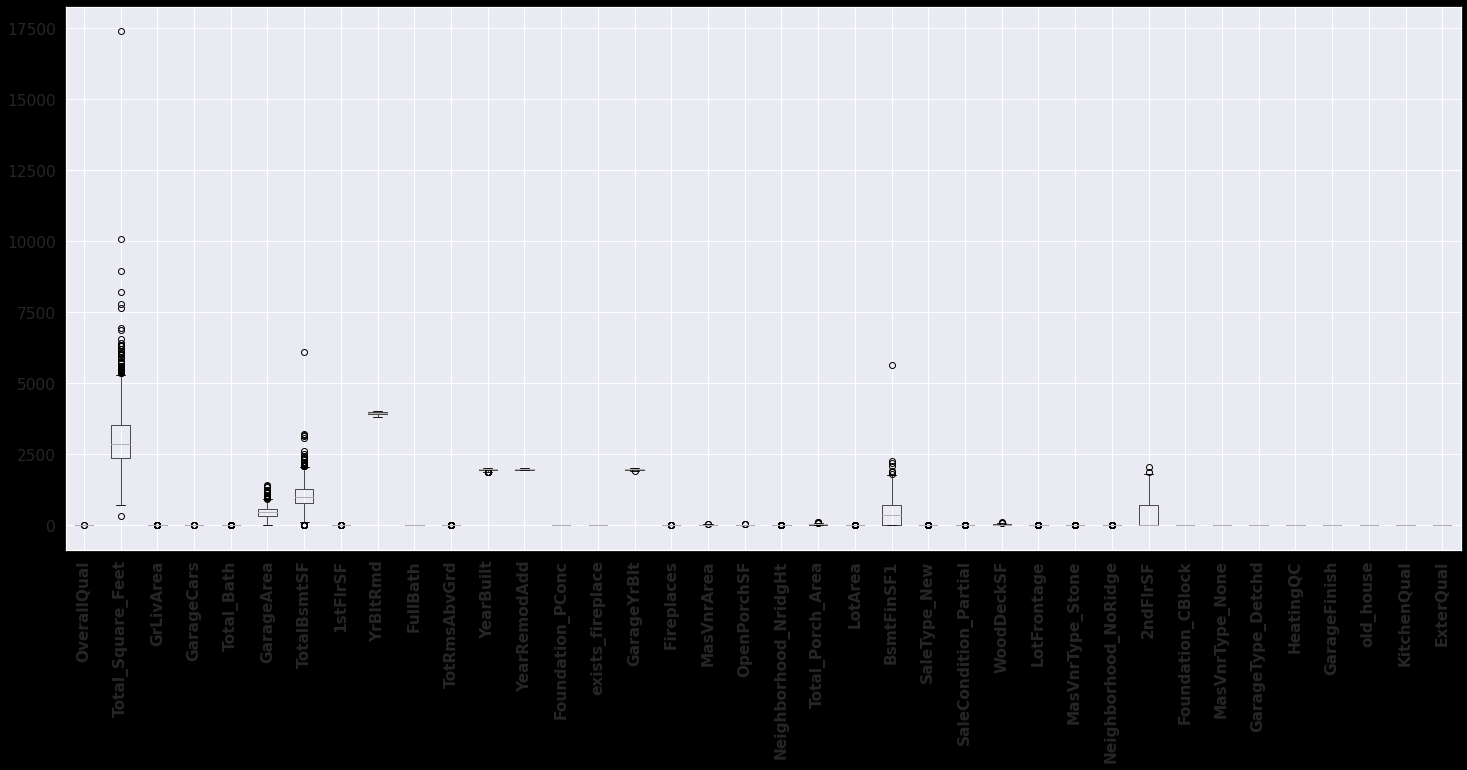

In [30]:
plt.style.use('dark_background')
plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
train.boxplot(column=best_columns)
plt.xticks(weight='bold',rotation=90)

In [31]:
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log1p
0,1,5,13.668864,13.424520,1.965139,1,3,0.0,7,4,2003,2003,19.509966,5.498765,5.100237,54.556642,5.218987,6.112249,2,706.0,1444.255548,0.0,150.0,856.0,0,72.932968,5.318379,854,0.0,7.234115,1.0,0.0,2,1,3,0.75096,5.077704,8,30.831053,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.247699
1,2,0,15.311587,13.694527,1.965139,1,3,0.0,6,7,1976,1976,0.000000,11.456357,5.100237,54.556642,5.218987,1.372290,0,978.0,1444.255548,0.0,284.0,1262.0,0,72.932968,5.550627,0,0.0,6.947212,0.0,1.0,2,0,3,0.75096,10.302990,6,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.109016
2,3,5,14.011693,14.034133,1.965139,1,0,0.0,7,4,2001,2002,17.835996,5.498765,5.100237,54.556642,5.218987,3.429155,2,486.0,1444.255548,0.0,434.0,920.0,0,72.932968,5.362015,866,0.0,7.275132,1.0,0.0,2,1,3,0.75096,5.077704,6,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.317171
3,4,6,13.079140,13.683421,1.965139,1,0,0.0,7,4,1915,1970,0.000000,11.456357,5.100237,54.556642,1.280547,6.112249,0,216.0,1444.255548,0.0,540.0,756.0,2,72.932968,5.388291,756,0.0,7.237969,1.0,0.0,1,0,3,0.75096,5.077704,7,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,11.849405
4,5,5,15.722537,14.550142,1.965139,1,0,0.0,8,4,2000,2000,25.518156,5.498765,5.100237,54.556642,5.218987,0.000000,2,655.0,1444.255548,0.0,490.0,1145.0,0,72.932968,5.493032,1053,0.0,7.470741,1.0,0.0,2,1,4,0.75096,5.077704,9,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.429220


In [33]:
print(min(train['SalePrice_Log1p']))
print(max(train['SalePrice_Log1p']))

10.460270761075149
13.534474352733596


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


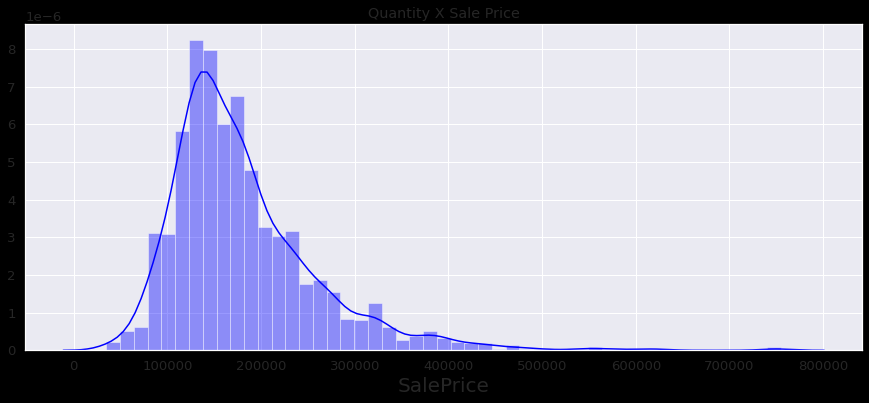

In [34]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice'],color='blue')
plt.xlabel('SalePrice',fontsize=20)
plt.title('Quantity X Sale Price')

print('Skew Dist:',train['SalePrice'].skew())
print('Kurtosis Dist:',train['SalePrice'].kurt())

Skew Dist: 0.12134661989685333
Kurtosis Dist: 0.809519155707878


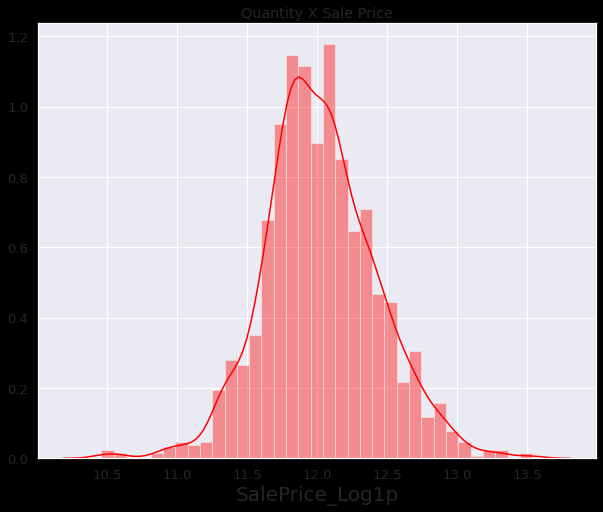

In [35]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice_Log1p'],color='red')
plt.xlabel('SalePrice_Log1p',fontsize=20)
plt.title('Quantity X Sale Price')

print('Skew Dist:',train['SalePrice_Log1p'].skew())
print('Kurtosis Dist:',train['SalePrice_Log1p'].kurt())

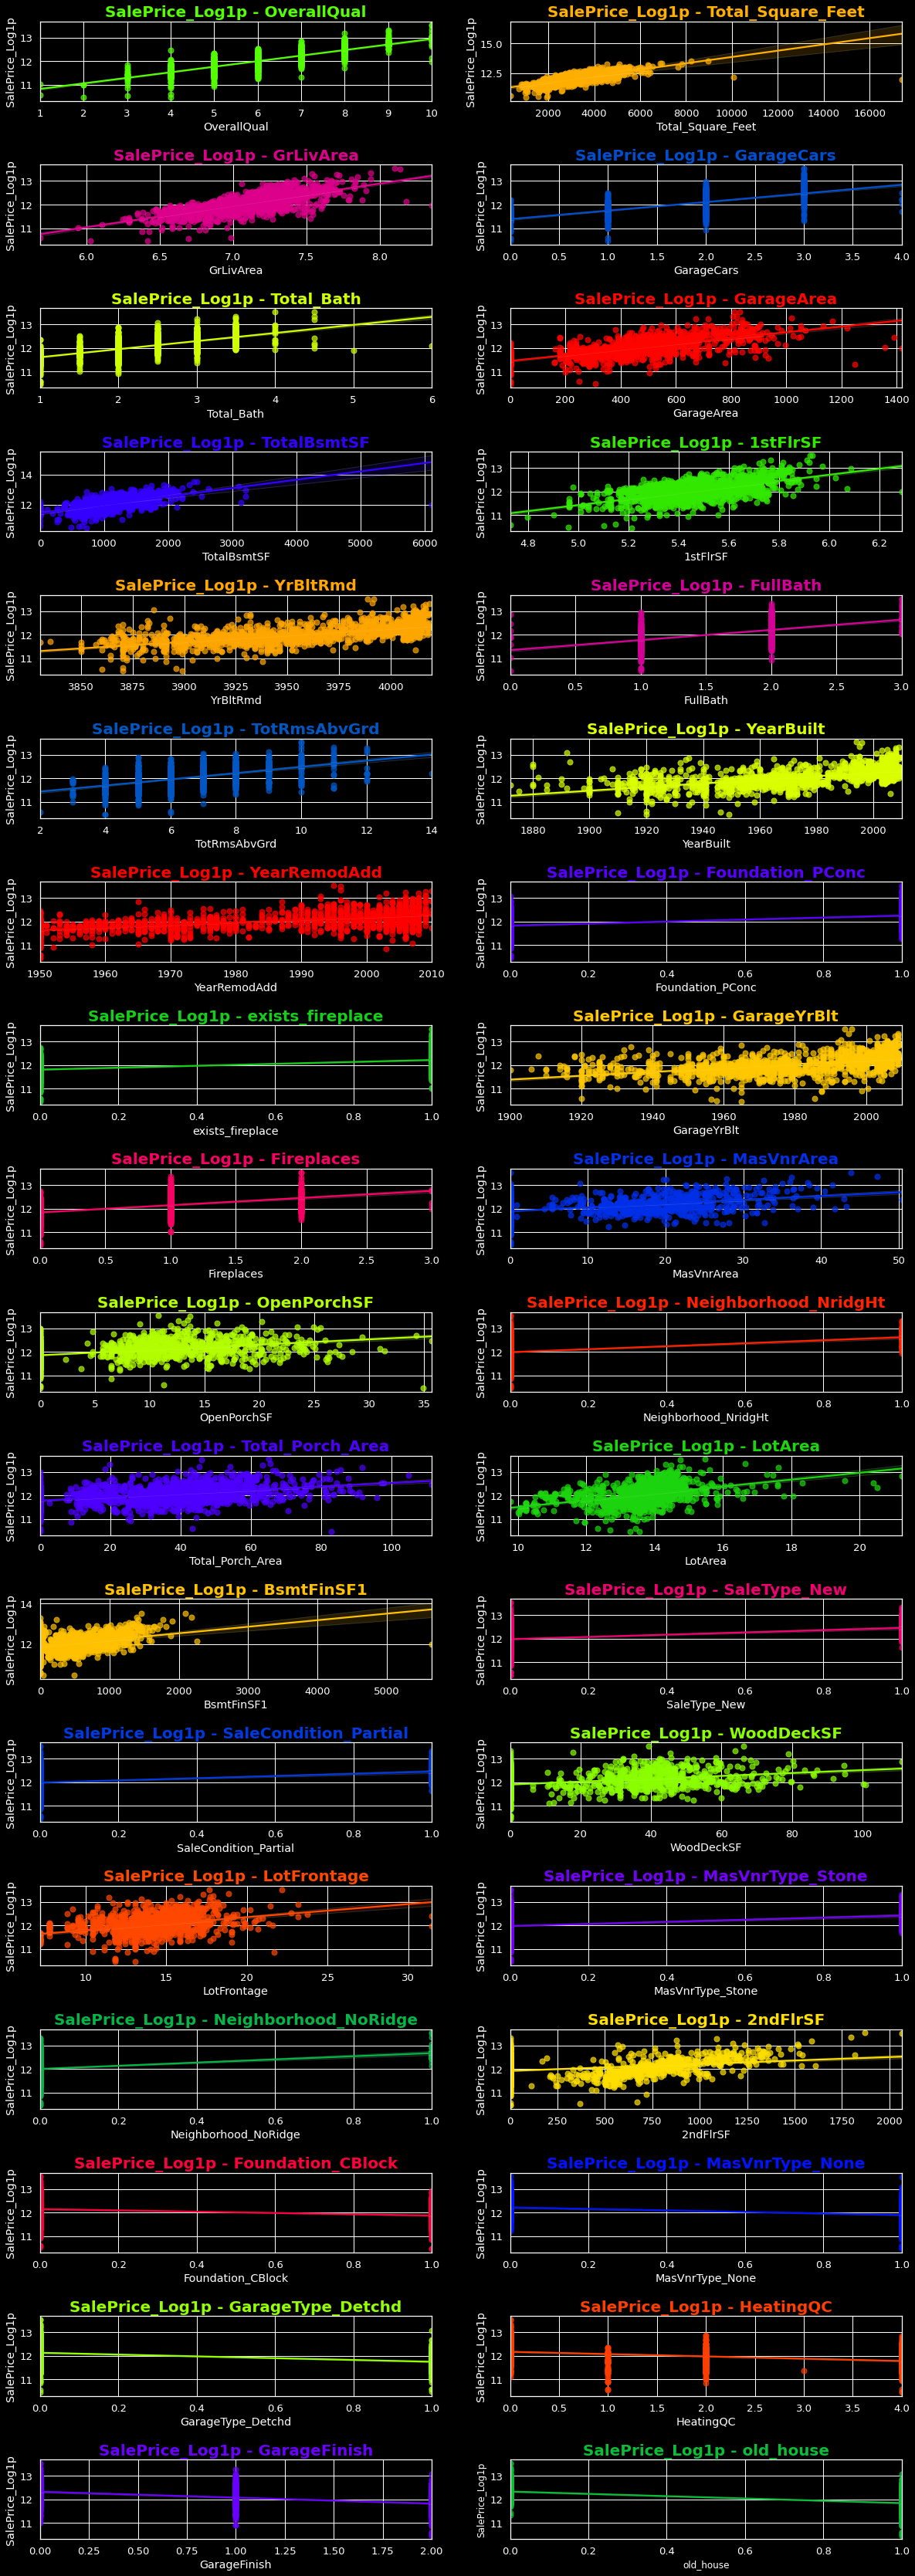

In [36]:
plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)
sb.set(font_scale=1.2)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice_Log1p"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.7},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice_Log1p',fontsize=12)
    ax.set_title('SalePrice_Log1p'+' - '+str(i),color=color,fontweight='bold',size=20)

In [37]:
print(len(train[(train.KitchenQual==3) & (train.SalePrice>360000)].index))

0


# Clean Outliers

In [38]:
len(train)

1460

In [0]:
"Looking at the SalePrice and SalePrice_Log1p visualizations"

#train = train.drop(train[(train.OverallQual==4) & (train.SalePrice>200000)].index)
train = train.drop(train[(train.OverallQual==10) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.Total_Square_Feet>=10000) & (train.SalePrice<200000)].index)
#train = train.drop(train[(train.Total_SF<3000) & (train.SalePrice>375000)].index)
#train = train.drop(train[(train.GrLivArea>4500) & (train.SalePrice<200000)].index)
#train = train.drop(train[(train.GrLivArea<3000) & (train.SalePrice>575000)].index)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<165000)].index)
train = train.drop(train[(train.Total_Bath.isin([5,6])) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.TotRmsAbvGrd==10) & (train.SalePrice>700000)].index)
train = train.drop(train[(train.YearBuilt<1900) & (train.SalePrice>250000)].index)
train = train.drop(train[(train.YearBuilt>2000) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.YearRemodAdd<1970) & (train.SalePrice>350000)].index)
train = train.drop(train[(train.MasVnrArea>=1400) & (train.SalePrice<250000)].index)
train = train.drop(train[(train.GarageYrBlt<1960) & (train.SalePrice>340000)].index)
train = train.drop(train[(train.Total_Porch_Area>600) & (train.SalePrice<50000)].index)
train = train.drop(train[(train.LotFrontage>150) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.GarageFinish.isin([1,2])) & (train.SalePrice>470000)].index)
train = train.drop(train[(train.old_house==0) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.old_house==1) & (train.SalePrice>400000)].index)
train = train.drop(train[(train.KitchenQual==2) & (train.SalePrice>600000)].index)
train = train.drop(train[(train.KitchenQual==3) & (train.SalePrice>360000)].index)
#train = train.drop(train[(train.ExterQual==2) & (train.SalePrice>550000)].index)

train = train[train.GarageArea * train.GarageCars < 3700]
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]

In [40]:
len(train)

1441

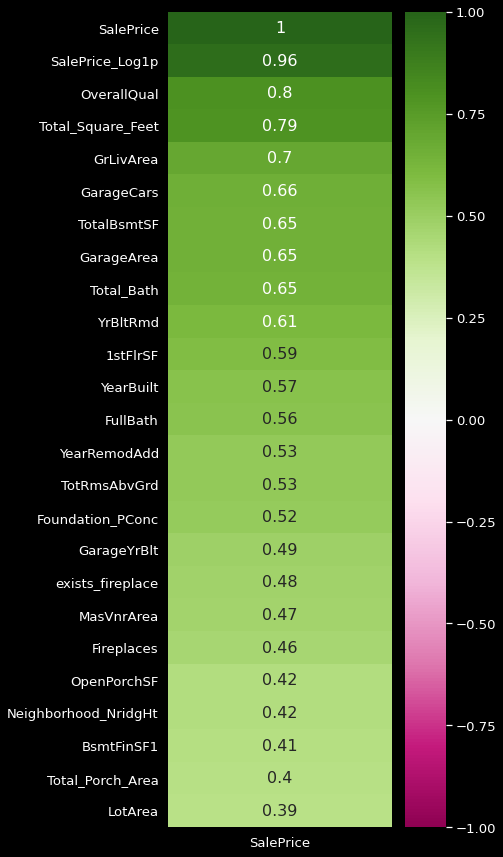

In [41]:
plt.style.use('dark_background')
corr1_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [42]:
train.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
Street                   0
Alley                    0
LotShape                 0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
T

In [43]:
test.isnull().sum()

Id                          0
MSSubClass                  0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandSlope                   0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
CentralAir                  0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath  

In [0]:
del test['SalePrice']

In [45]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log1p
0,1,5,13.668864,13.424520,1.965139,1,3,0.0,7,4,2003,2003,19.509966,5.498765,5.100237,54.556642,5.218987,6.112249,2,706.0,1444.255548,0.0,150.0,856.0,0,72.932968,5.318379,854,0.0,7.234115,1.0,0.0,2,1,3,0.75096,5.077704,8,30.831053,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.247699
1,2,0,15.311587,13.694527,1.965139,1,3,0.0,6,7,1976,1976,0.000000,11.456357,5.100237,54.556642,5.218987,1.372290,0,978.0,1444.255548,0.0,284.0,1262.0,0,72.932968,5.550627,0,0.0,6.947212,0.0,1.0,2,0,3,0.75096,10.302990,6,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.109016
2,3,5,14.011693,14.034133,1.965139,1,0,0.0,7,4,2001,2002,17.835996,5.498765,5.100237,54.556642,5.218987,3.429155,2,486.0,1444.255548,0.0,434.0,920.0,0,72.932968,5.362015,866,0.0,7.275132,1.0,0.0,2,1,3,0.75096,5.077704,6,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.317171
3,4,6,13.079140,13.683421,1.965139,1,0,0.0,7,4,1915,1970,0.000000,11.456357,5.100237,54.556642,1.280547,6.112249,0,216.0,1444.255548,0.0,540.0,756.0,2,72.932968,5.388291,756,0.0,7.237969,1.0,0.0,1,0,3,0.75096,5.077704,7,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,11.849405
4,5,5,15.722537,14.550142,1.965139,1,0,0.0,8,4,2000,2000,25.518156,5.498765,5.100237,54.556642,5.218987,0.000000,2,655.0,1444.255548,0.0,490.0,1145.0,0,72.932968,5.493032,1053,0.0,7.470741,1.0,0.0,2,1,4,0.75096,5.077704,9,30.831053,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.429220


# Create Model

In [0]:
X=train.drop(['SalePrice','SalePrice_Log1p'],axis=1)
y=train.SalePrice_Log1p

In [0]:
#def overfit_reducer(df):

 #   overfit = []
   # for i in df.columns:
    #    counts = df[i].value_counts()
    #    zeros = counts.iloc[0]
    #    if zeros / len(df) * 100 > 99.9:
  #          overfit.append(i)
 #   overfit = list(overfit)
 #   return overfit
#overfitted_features = overfit_reducer(X)

In [48]:
print(X.shape)
print(test.shape)

(1441, 231)
(1459, 231)


In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer

In [50]:
std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(test)
test_rbst=rbst_scaler.transform(test)
test_pwr=power_transformer.transform(test)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [0]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.002,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (1438, 231)
X_test Shape : (3, 231)
y_train Shape : (1438,)
y_test Shape : (3,)


In [0]:
import  lightgbm as lgb

In [0]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [55]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LGBM----------
R square Accuracy:  0.9790173123541388
Mean Absolute Error Accuracy:  0.06748478394454338
Mean Squared Error Accuracy:  0.006757376878056529


In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.9900705740075889
Mean Absolute Error Accuracy:  0.04894685157920738
Mean Squared Error Accuracy:  0.0031977254175409274


In [0]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

In [59]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------RidgeCV----------
R square Accuracy:  0.9802324466453574
Mean Absolute Error Accuracy:  0.05246254139646448
Mean Squared Error Accuracy:  0.006366048536244519


In [0]:
from sklearn.linear_model import LassoCV

In [61]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.90007802700591, tolerance: 0.01903794564445878
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.14307585495519, tolerance: 0.01903794564445878
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.171615606845256, tolerance: 0.01903794564445878
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to in

----------LassoCV----------
R square Accuracy:  0.9793945817155248
Mean Absolute Error Accuracy:  0.05153874275816447
Mean Squared Error Accuracy:  0.006635879036480805


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.983216373278321, tolerance: 0.022080798946972253
  positive)


In [0]:
from sklearn.linear_model import ElasticNetCV

In [63]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train, y_train)
y_head=elasticv_reg.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031712134975643735, tolerance: 0.01903794564445878
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04883269955685954, tolerance: 0.019462347305804272
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022018664093174323, tolerance: 0.019633286608834077
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You migh

----------ElasticNetCV----------
R square Accuracy:  0.9406254707805044
Mean Absolute Error Accuracy:  0.09323945899077302
Mean Squared Error Accuracy:  0.019121290735719925


In [0]:
from sklearn.ensemble import StackingRegressor, ExtraTreesRegressor

In [65]:
estimators = [('lgbm', lgb_regressor),
              ('gbr', gb_reg),   
              ('lasso', lassocv_reg),   
              ('ridge', ridgecv_reg),   
              ('elasticnet', elasticv_reg)]

stack_reg=StackingRegressor(estimators=estimators,final_estimator=ExtraTreesRegressor(n_estimators=50),n_jobs=-1)
stack_reg.fit(X_train, y_train)
y_head=stack_reg.predict(X_test)
print('-'*10+'StackingRegressor'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------StackingRegressor----------
R square Accuracy:  0.9500703667625108
Mean Absolute Error Accuracy:  0.09076467543325073
Mean Squared Error Accuracy:  0.016079605952452995


In [66]:
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head()

,SalePrice_Log1p,Predict
0,11.831386,11.882641
1,12.843974,12.630540
2,11.512935,11.505330


In [67]:
print('Count columns of test: ',len(test.columns))
print('Count columns of X: ',len(X.columns))

Count columns of test:  231
Count columns of X:  231


In [0]:
test_pred_lgb=lgb_regressor.predict(test_pwr)
test_pred_gb=gb_reg.predict(test_pwr)
test_pred_elastic=elasticv_reg.predict(test_pwr)
test_pred_ridge=ridgecv_reg.predict(test_pwr)
test_pred_lasso=lassocv_reg.predict(test_pwr)
test_pred_stack=stack_reg.predict(test_pwr)

In [0]:
test_pred_lgb=pd.DataFrame(test_pred_lgb,columns=['SalePrice'])
test_pred_gb=pd.DataFrame(test_pred_gb,columns=['SalePrice'])
test_pred_elastic=pd.DataFrame(test_pred_elastic,columns=['SalePrice'])
test_pred_ridge=pd.DataFrame(test_pred_ridge,columns=['SalePrice'])
test_pred_lasso=pd.DataFrame(test_pred_lasso,columns=['SalePrice'])
test_pred_stack=pd.DataFrame(test_pred_stack,columns=['SalePrice'])

In [0]:
test_pred_lgb.SalePrice =np.floor(np.expm1(test_pred_lgb.SalePrice))
test_pred_gb.SalePrice =np.floor(np.expm1(test_pred_gb.SalePrice))
test_pred_elastic.SalePrice =np.floor(np.expm1(test_pred_elastic.SalePrice))
test_pred_ridge.SalePrice =np.floor(np.expm1(test_pred_ridge.SalePrice))
test_pred_lasso.SalePrice =np.floor(np.expm1(test_pred_lasso.SalePrice))
test_pred_stack.SalePrice =np.floor(np.expm1(test_pred_stack.SalePrice))

In [71]:
test_pred_lgb.head()

,SalePrice
0,125016.0
1,158864.0
2,182178.0
3,202457.0
4,180806.0


In [72]:
test_pred_gb.head()

,SalePrice
0,130548.0
1,158144.0
2,196445.0
3,204828.0
4,182452.0


In [73]:
test_pred_elastic.head()

,SalePrice
0,122057.0
1,160706.0
2,186327.0
3,204462.0
4,204662.0


In [74]:
test_pred_ridge.head()

,SalePrice
0,129798.0
1,164817.0
2,186399.0
3,204956.0
4,210047.0


In [75]:
test_pred_lasso.head()

,SalePrice
0,134101.0
1,164081.0
2,186146.0
3,207846.0
4,212603.0


In [76]:
test_pred_stack.head()

,SalePrice
0,127375.0
1,162444.0
2,189118.0
3,200973.0
4,190609.0


In [77]:
final_pred=(test_pred_stack*0.1665)+(test_pred_lgb*0.678)+(test_pred_ridge*0.1665)
final_pred.head()

,SalePrice
0,127580.1525
1,162198.7485
2,186040.2645
3,204853.0245
4,189295.6920


In [0]:
sample_sub['SalePrice']=final_pred

In [83]:
sample_sub.head()

,Id,SalePrice
0,1461,127580.1525
1,1462,162198.7485
2,1463,186040.2645
3,1464,204853.0245
4,1465,189295.6920


In [0]:
sample_sub.to_csv('HousePrice.csv',index=False)

# Start machine learning - Train_test

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
variable = ['OverallQual', 'Total_Square_Feet', 'GrLivArea', 'GarageCars', 'Total_Bath', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
 'YrBltRmd', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Foundation_PConc', 'exists_fireplace', 'GarageYrBlt', 
 'Fireplaces', 'MasVnrArea', 'OpenPorchSF', 'Neighborhood_NridgHt', 'Total_Porch_Area', 'LotArea', 'BsmtFinSF1', 'SaleType_New', 
 'SaleCondition_Partial', 'WoodDeckSF', 'LotFrontage', 'MasVnrType_Stone', 'Neighborhood_NoRidge', '2ndFlrSF', 'Foundation_CBlock',
  'MasVnrType_None', 'GarageType_Detchd', 'HeatingQC', 'GarageFinish', 'old_house', 'KitchenQual', 'ExterQual']

In [0]:
x = train[variable]
y = train['SalePrice']

In [0]:
x.head()

In [0]:
np.random.seed(0)
x_train, x_valid, y_train, y_valid =  train_test_split(x,y, test_size=0.5)

In [0]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

In [0]:
x = x.fillna(-1)

In [0]:
x_prev = test[variable]
x_prev = x_prev.fillna(-1)

In [0]:
x_train = x_train.fillna(-1)
y_train = y_train.fillna(-1)

In [0]:
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
model.fit(x_train, y_train)

In [0]:
x_valid = x_valid.fillna(-1)

In [0]:
p = model.predict(x_valid)

In [0]:
np.mean(y_valid == p)

In [0]:
x_prev.head()

In [0]:
p =   model.predict(x_prev)

In [0]:
p

#Cross Validation

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [0]:
result =[]
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(x):
  print("Train:", line_train.shape[0])
  print("Test:", line_valid.shape[0])
  print()

  x_train, x_valid = x.iloc[line_train], x.iloc[line_valid]
  y_train, y_valid = y.iloc[line_train], y.iloc[line_valid]
  #print(x_train.head)
  #print()

  model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  model.fit(x_train, y_train)

  p= model.predict(x_valid)
  acc=np.mean(y_valid ==p)
  result.append(acc)
  print("Acc:", acc)
  print()

In [0]:
%matplotlib inline
%pylab inline

In [0]:

pylab.hist(result)

In [0]:
np.mean(result)

In [0]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(x,y)
p=model.predict(test[variable].fillna(-1))  

# Submission

In [0]:
sub = pd.Series(p, index=test['Id'], name = 'SalePrice')
sub.shape

In [0]:
sub.to_csv("house_prices.csv")

In [0]:
!head -n10 house_prices.csv